# Playing with Quantum Dot Images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import sys
import collections as c

%matplotlib inline

In [3]:
cap = cv2.VideoCapture("run1.avi")

In [4]:
ret, cimg = cap.read()

In [5]:
cimg.shape # figure out which axis is which

(512, 512, 3)

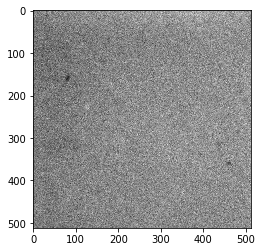

In [7]:
img = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY) # I'll work with a grayscale version
plt.imshow(img, cmap="gray")

## Blur

Text(0,0.5,'count')

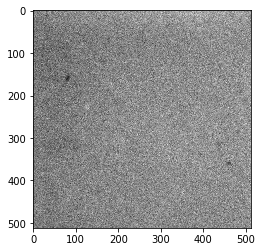

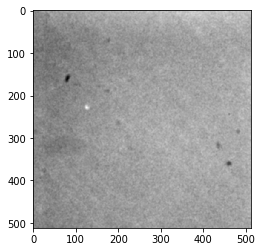

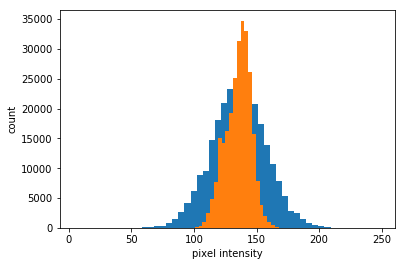

In [9]:
plt.figure()
plt.imshow(img, cmap="gray")
plt.figure()
blur = cv2.blur(img,(5,5))
plt.imshow(blur, cmap="gray")
plt.figure()
_ = plt.hist(np.ndarray.flatten(img), bins=50)
_ = plt.hist(np.ndarray.flatten(blur), bins=50)
plt.xlabel('pixel intensity')
plt.ylabel('count')

Gaussian blur makes the quantum dot much more evident.

Looks like the gaussian blur decreases the variance. This makes sense because the noise is smoothed out and bright pixels are averaged with dark ones.

## Background Subtraction

In [11]:
imgQueue = c.deque(maxlen=10) # I'll use a circular buffer to store recent images

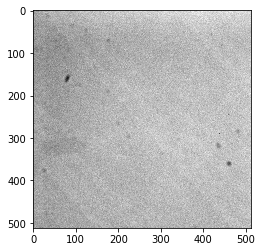

In [18]:
for i in range(10):
    ret, cimg = cap.read()
    gimg = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY).astype(float)
    imgQueue.append(gimg)
avgImg = np.median(np.array(imgQueue),axis=0)
plt.imshow(avgImg, cmap="gray")

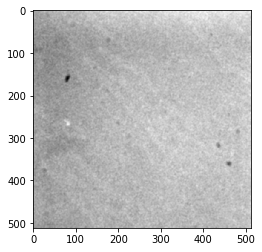

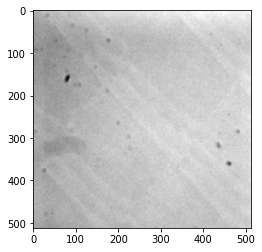

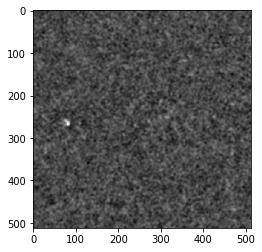

In [14]:
ret, cimg = cap.read()
gimg = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY).astype(float)

blurred = cv2.blur(gimg, (5, 5))
blurredMean = cv2.blur(avgImg, (5, 5))

diff = blurred-blurredMean
diff = cv2.blur(diff, (5, 5))

#pimg = ((255./np.max(diff)) * diff).clip(min=0, max=255).astype(np.uint8)

diff -= np.min(diff)
diff *= 255 / np.max(diff)
pimg = diff.astype(np.uint8)


plt.figure()
plt.imshow(blurred, cmap="gray")
plt.figure()
plt.imshow(blurredMean, cmap="gray")
plt.figure()
plt.imshow(pimg, cmap="gray")

The position of the quantum dot is now very obvious.

Text(0,0.5,'count')

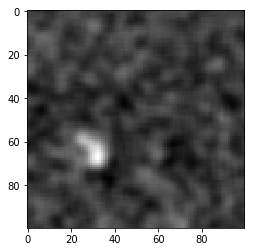

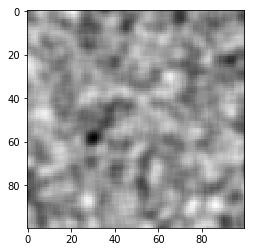

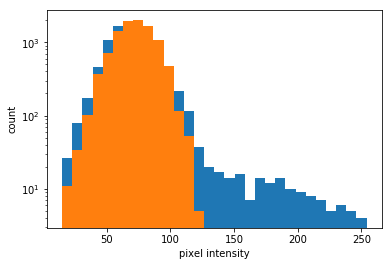

In [15]:
plt.figure()
plt.imshow(pimg[200:300,50:150], cmap="gray")
plt.figure()
plt.imshow(pimg[300:400,100:200], cmap="gray")

plt.figure()
_,bins,_ = plt.hist(np.ndarray.flatten(pimg[200:300,50:150]), bins=30, log=True)
_ = plt.hist(np.ndarray.flatten(pimg[300:400,100:200]), bins=bins, log=True)
plt.xlabel('pixel intensity')
plt.ylabel('count')
